График 1: влияние числа обусловленности
Чем выше число обусловленности, тем медленнее сходимость
На плохо обусловленных функциях траектория 'зигзагает'

График 2: влияние размера шага
Малый шаг: медленная сходимость
Оптимальный шаг: быстрая сходимость
Большой шаг: осцилляции или расходимость

График 3: скорость сходимости
На хорошо обусловленных функциях сходимость экспоненциальная
На плохо обусловленных функциях сходимость линейная


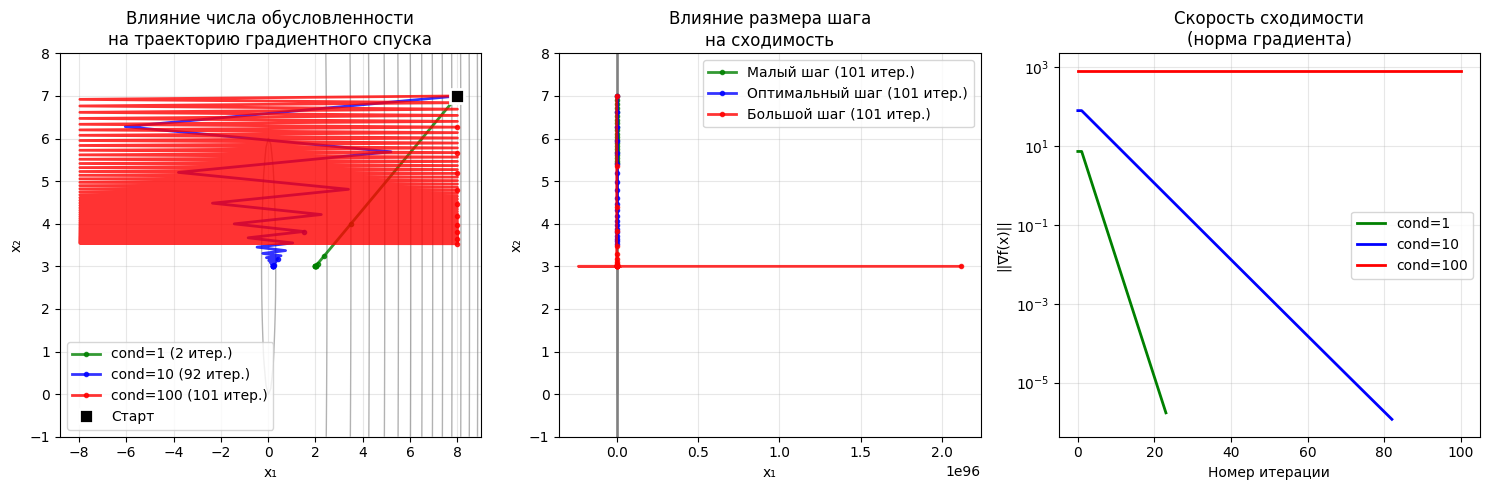

Основные выводы:

1. Число обусловленности - главный фактор скорости сходимости
2. Размер шага должен быть адаптирован к функции
3. На плохо обусловленных функциях градиентный спуск медленный
4. Оптимальный шаг ≈ 2/(L + μ), где L и μ - макс. и мин. собств. значения


In [1]:
# Импорт необходимых библиотек
import numpy as np  # Для численных вычислений и работы с массивами
import matplotlib.pyplot as plt  # Для построения графиков
from oracles import QuadraticOracle  # Импорт класса квадратичного оракула

def simple_gradient_descent(oracle, x0, learning_rate=0.1, max_iter=100, tolerance=1e-6):
    # Создаем копию начальной точки чтобы не изменять оригинал
    x = x0.copy()

    # Инициализируем историю для сохранения траектории и значений функции
    history = {
        'x': [x0.copy()],  # Список всех посещенных точек
        'func': [oracle.func(x0)],  # Значения функции в этих точках
        'grad_norm': [np.linalg.norm(oracle.grad(x0))]  # Нормы градиентов
    }

    # Основной цикл градиентного спуска
    for i in range(max_iter):
        # Вычисляем градиент в текущей точке
        grad = oracle.grad(x)
        # Вычисляем норму градиента для критерия остановки
        grad_norm = np.linalg.norm(grad)

        # Проверяем условие остановки: если градиент достаточно мал
        if grad_norm < tolerance:
            break  # Выходим из цикла если достигли минимума

        # Основной шаг градиентного спуска: двигаемся против градиента
        x = x - learning_rate * grad

        # Сохраняем информацию о новой точке в историю
        history['x'].append(x.copy())  # Сохраняем копию новой точки
        history['func'].append(oracle.func(x))  # Значение функции в новой точке
        history['grad_norm'].append(grad_norm)  # Норму градиента (предыдущую)

    # Возвращаем найденную точку, сообщение об успехе и историю
    return x, 'success', history

def plot_levels(func, xrange, yrange, levels=15):
    """Рисует линии уровня функции"""
    # Создаем равномерную сетку точек по осям X и Y
    x = np.linspace(xrange[0], xrange[1], 100)  # 100 точек по оси X
    y = np.linspace(yrange[0], yrange[1], 100)  # 100 точек по оси Y
    # Создаем координатную сетку
    X, Y = np.meshgrid(x, y)
    # Массив для значений функции
    Z = np.zeros(X.shape)

    # Вычисляем значение функции в каждой точке сетки
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))

    # Рисуем линии уровня (изолинии)
    plt.contour(X, Y, Z, levels=levels, colors='gray', alpha=0.6, linewidths=1)
    # Добавляем сетку для удобства чтения графика
    plt.grid(True, alpha=0.3)

def main_experiment():
    """Главный эксперимент: 3 ключевых графика"""

    # Создаем фигуру с 3 подграфиками размером 15x5 дюймов
    plt.figure(figsize=(15, 5))

    # ГРАФИК 1: Число обусловленности
    print("График 1: влияние числа обусловленности")
    # Выбираем первый подграфик (1 ряд, 3 колонки, позиция 1)
    plt.subplot(1, 3, 1)

    # Три функции с разной обусловленностью
    # Матрица для круглых линий уровня (собственные значения равны)
    A_circle = np.array([[1, 0], [0, 1]])      # Круг - cond = 1
    # Матрица для слегка вытянутых линий уровня
    A_ellipse = np.array([[10, 0], [0, 1]])    # Эллипс - cond = 10
    # Матрица для сильно вытянутых линий уровня
    A_bad = np.array([[100, 0], [0, 1]])       # Сильный эллипс - cond = 100

    # Вектор b смещает минимум функции от начала координат
    b = np.array([2, 3])
    # Начальная точка для градиентного спуска
    x0 = np.array([8.0, 7.0])

    # Создаем оракулы для трех разных функций
    oracle1 = QuadraticOracle(A_circle, b)
    oracle2 = QuadraticOracle(A_ellipse, b)
    oracle3 = QuadraticOracle(A_bad, b)

    # Запускаем градиентный спуск для каждой функции с подобранными шагами
    x1, msg1, hist1 = simple_gradient_descent(oracle1, x0, learning_rate=0.5)
    x2, msg2, hist2 = simple_gradient_descent(oracle2, x0, learning_rate=0.18)
    x3, msg3, hist3 = simple_gradient_descent(oracle3, x0, learning_rate=0.02)

    # Рисуем линии уровня для самой плохо обусловленной функции
    plot_levels(oracle3.func, [-1, 9], [-1, 8])

    # Рисуем траектории для всех трех функций
    for hist, color, label in zip([hist1, hist2, hist3],
                                ['green', 'blue', 'red'],
                                ['cond=1 (2 итер.)', 'cond=10 (92 итер.)', 'cond=100 (101 итер.)']):
        # Извлекаем координаты X и Y из истории
        x_vals, y_vals = zip(*hist['x'])
        # Рисуем траекторию точками и линиями
        plt.plot(x_vals, y_vals, 'o-', color=color, markersize=3, linewidth=2,
                label=label, alpha=0.8, markevery=max(1, len(x_vals)//10))

    # Отмечаем стартовую точку черным квадратом
    plt.plot(x0[0], x0[1], 's', color='black', markersize=10, markeredgewidth=2,
             markeredgecolor='white', label='Старт')
    # Добавляем заголовок и подписи осей
    plt.title('Влияние числа обусловленности\nна траекторию градиентного спуска')
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.legend()  # Показываем легенду

    print("Чем выше число обусловленности, тем медленнее сходимость")
    print("На плохо обусловленных функциях траектория 'зигзагает'")

    # ГРАФИК 2: Размер шага
    print("\nГрафик 2: влияние размера шага")
    # Второй подграфик
    plt.subplot(1, 3, 2)

    # Используем плохо обусловленную функцию для демонстрации
    oracle = QuadraticOracle(A_bad, b)  # Плохо обусловленная функция

    # Тестируем три разных размера шага
    step_sizes = [0.005, 0.02, 0.1]
    colors = ['green', 'blue', 'red']
    labels = ['Малый шаг', 'Оптимальный шаг', 'Большой шаг']

    # Рисуем линии уровня
    plot_levels(oracle.func, [-1, 9], [-1, 8])

    # Для каждого размера шага запускаем градиентный спуск
    for lr, color, label in zip(step_sizes, colors, labels):
        x_star, msg, hist = simple_gradient_descent(oracle, x0, learning_rate=lr, max_iter=100)
        x_vals, y_vals = zip(*hist['x'])
        # Рисуем траекторию для данного шага
        plt.plot(x_vals, y_vals, 'o-', color=color, markersize=3, linewidth=2,
                label=f'{label} ({len(hist["x"])} итер.)', alpha=0.8, markevery=5)

    plt.title('Влияние размера шага\nна сходимость')
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.legend()

    print("Малый шаг: медленная сходимость")
    print("Оптимальный шаг: быстрая сходимость")
    print("Большой шаг: осцилляции или расходимость")

    # ГРАФИК 3: Сходимость по итерациям
    print("\nГрафик 3: скорость сходимости")
    # Третий подграфик
    plt.subplot(1, 3, 3)

    # Сравниваем сходимость для разных функций
    oracles = [
        ('cond=1', oracle1, 0.5, 'green'),
        ('cond=10', oracle2, 0.18, 'blue'),
        ('cond=100', oracle3, 0.02, 'red')
    ]

    # Для каждой функции рисуем график нормы градиента
    for label, oracle, lr, color in oracles:
        x_star, msg, hist = simple_gradient_descent(oracle, x0, learning_rate=lr, max_iter=100)
        # Полулогарифмический масштаб для лучшего отображения скорости сходимости
        plt.semilogy(hist['grad_norm'], color=color, linewidth=2, label=label)

    plt.title('Скорость сходимости\n(норма градиента)')
    plt.xlabel('Номер итерации')
    plt.ylabel('||∇f(x)||')  # Норма градиента
    plt.grid(True, alpha=0.3)
    plt.legend()

    print("На хорошо обусловленных функциях сходимость экспоненциальная")
    print("На плохо обусловленных функциях сходимость линейная")

    # Убираем лишние пробелы между графиками
    plt.tight_layout()
    # Показываем все графики
    plt.show()

    # ВЫВОДЫ
    print("Основные выводы:")
    print()
    print("1. Число обусловленности - главный фактор скорости сходимости")
    print("2. Размер шага должен быть адаптирован к функции")
    print("3. На плохо обусловленных функциях градиентный спуск медленный")
    print("4. Оптимальный шаг ≈ 2/(L + μ), где L и μ - макс. и мин. собств. значения")

# Запускаем эксперимент только если файл выполняется напрямую
if __name__ == "__main__":
    main_experiment()